Title: Pathways Asscociated with Genes Implicated by ASD GWAS and SCZ single-cell RNAseq
Author: Fallon Ratner
Date: 21-02-2024

## Setting Up
- Import Libraries
- Read in datasets: ASD GWAS mapped genes, DEGs from Sawada organoids, and DEGs from Notaras organoids
- Identify common genes between gwas and each organoid DEG
- Use gseapy to identify cellular pathways associated with the genes
- Visualize the results


In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gseapy as gp
from matplotlib_venn import venn2

#select relevant working directory
os.chdir("C:/Users/fallo/OneDrive/Documents/URF_2023/Datasets")

gwas = pd.read_csv("asd_gwas_mapped_genes.txt", sep='\t')
# Set Gene_name column in gwas DataFrame
gwas['Gene_name'] = gwas['symbol']

notaras_deg = pd.read_csv("notaras_deg_condition.csv")
#skip first row 
sawada_deg = pd.read_csv("sawada_deg_condition.csv", skiprows = 1)

#Sawada selection criteria: log2FC > 0.585 and FDR < 0.01
#Apply this criteria to Notaras DEGs
#Convert logFC to log2FC
notaras_deg['Log2FC'] = np.log2(np.exp(notaras_deg['logFC']))

#subset_notaras_deg <- notaras_deg[notaras_deg$log2FC > 0.585 & notaras_deg$FDR < 0.01, ]
# no genes from notaras meet this critera so changing the FDR threshold to 0.1
subset_notaras_deg = notaras_deg[(notaras_deg['Log2FC'] > 0.585) & (notaras_deg['FDR'] < 0.1)]

## Compare ASD GWAS to SCZ GWAS

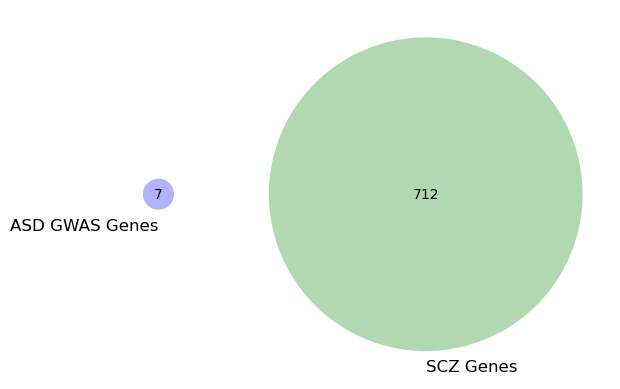

In [2]:
scz_gwas = pd.read_csv("SCZ_GWAS_mapped_genes.txt", sep='\t')
scz_gwas['Gene_name'] = scz_gwas['symbol']
#dataframe just for the gene names
asd_genes = gwas['Gene_name']
scz_genes = scz_gwas['Gene_name']

asd_genes_set = set(asd_genes)
scz_genes_set = set(scz_genes)

# Create a Venn diagram
venn_diagram = venn2([asd_genes_set, scz_genes_set], 
                     set_labels=('ASD GWAS Genes', 'SCZ Genes'),
                     set_colors=('blue', 'green'), alpha=0.3)

## Overlap between ASD GWAS and Sawada Organoid DEGs

In [11]:
# Find common genes
common_genes_sw = set(gwas['Gene_name']).intersection(sawada_deg['Gene_name'])

# Convert common genes to a list
common_genes_list_sw = list(common_genes_sw)

#Print the common genes
print(common_genes_list_sw)
#Print the number of common genes
len(common_genes_list_sw)

[]


0

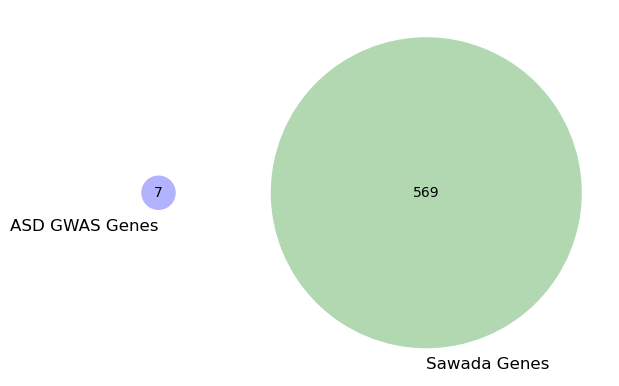

In [12]:
#Visualize overlap with venn plot

#dataframe just for the gene names
gwas_genes = gwas['Gene_name']
sawada_genes = sawada_deg['Gene_name']

gwas_genes_set = set(gwas_genes)
sawada_genes_set = set(sawada_genes)

# Create a Venn diagram
venn_diagram = venn2([gwas_genes_set, sawada_genes_set], 
                     set_labels=('ASD GWAS Genes', 'Sawada Genes'),
                     set_colors=('blue', 'green'), alpha=0.3)

Empty DataFrame
Columns: [Term, Adjusted P-value]
Index: []


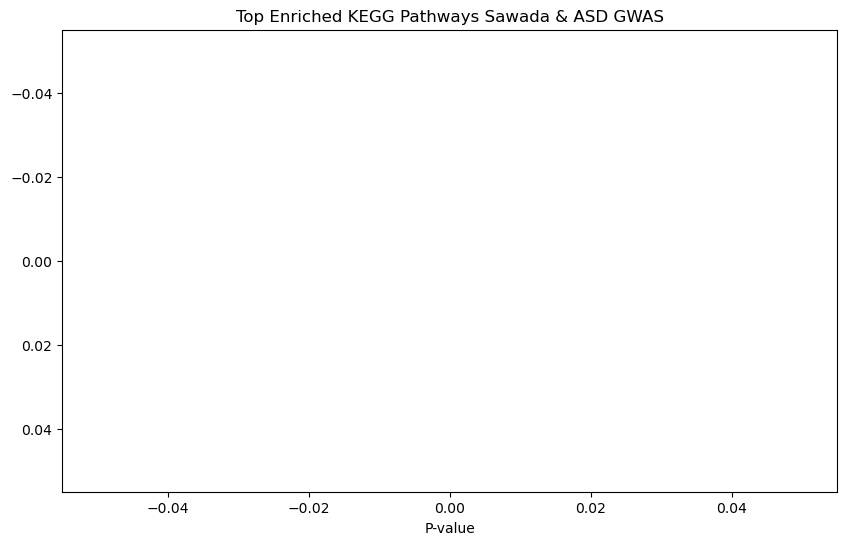

In [3]:
# Perform pathway enrichment analysis using KEGG gene sets
enr_sw = gp.enrichr(gene_list=common_genes_list_sw, organism='Human', gene_sets='KEGG_2019_Human', background=list(gwas['Gene_name']))

# Print the results
print(enr_sw.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways = enr_sw.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched KEGG Pathways Sawada & ASD GWAS')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()

Empty DataFrame
Columns: [Term, Adjusted P-value]
Index: []


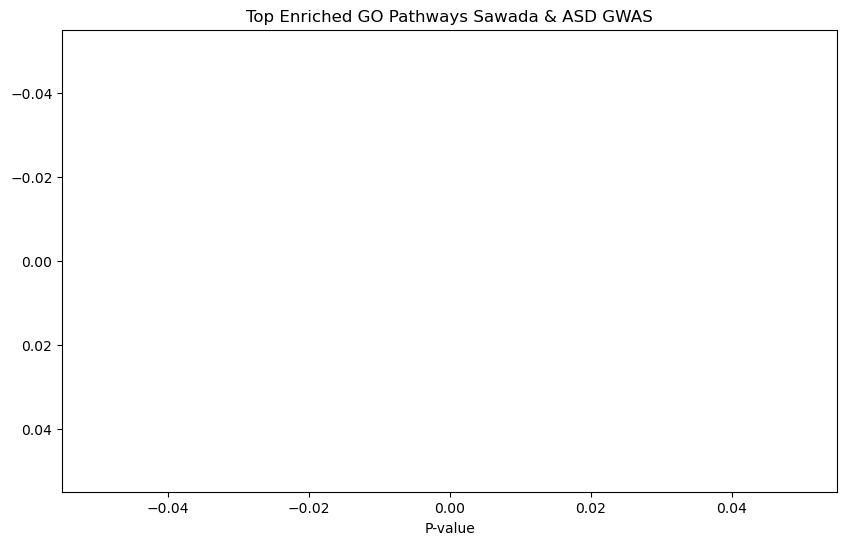

In [4]:
# Perform pathway enrichment analysis using GO gene sets
enr_sw_go = gp.enrichr(gene_list=common_genes_list_sw, organism='Human', gene_sets= 'GO_Biological_Process_2018', background=list(gwas['Gene_name']))

# Print the results
print(enr_sw_go.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways_go = enr_sw_go.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways_go['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched GO Pathways Sawada & ASD GWAS')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()

In [5]:
## Overlap between ASD GWAS and Notaras Organoid DEGs

In [6]:
# Find common genes
common_genes_nr = set(gwas['Gene_name']).intersection(subset_notaras_deg['Gene_name'])

# Convert common genes to a list
common_genes_list_nr = list(common_genes_nr)

#Print the common genes
print(common_genes_list_nr)
#Print the number of common genes
len(common_genes_list_nr)

['SOX7']


1

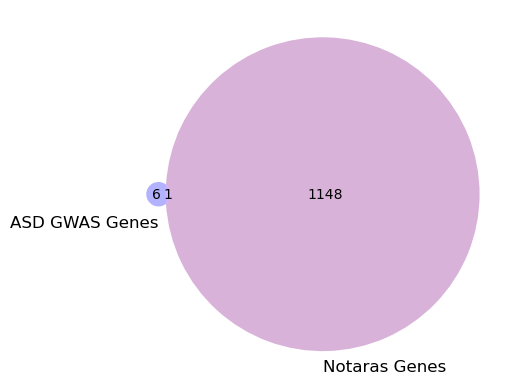

In [16]:
#Visualize overlap with venn plot

#dataframe just for the gene names
gwas_genes = gwas['Gene_name']
notaras_genes = subset_notaras_deg['Gene_name']

gwas_genes_set = set(gwas_genes)
notaras_genes_set = set(notaras_genes)

# Create a Venn diagram
venn_diagram2 = venn2([gwas_genes_set, notaras_genes_set], 
                     set_labels=('ASD GWAS Genes', 'Notaras Genes'),
                     set_colors=('blue', 'purple'), alpha=0.3)

Empty DataFrame
Columns: [Term, Adjusted P-value]
Index: []


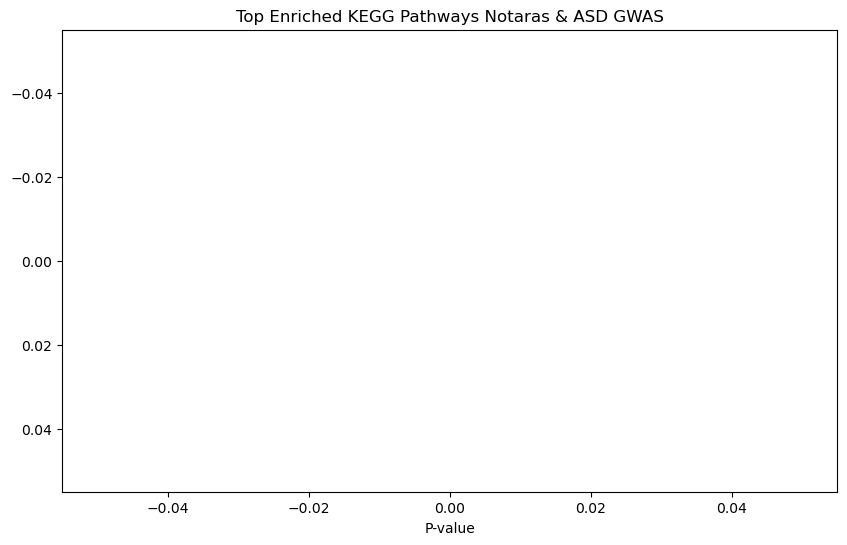

In [7]:
# Perform pathway enrichment analysis using KEGG gene set
enr_nr = gp.enrichr(gene_list=common_genes_list_nr, organism='Human', gene_sets='KEGG_2019_Human', background=list(gwas['Gene_name']))

# Print the results
print(enr_nr.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways = enr_nr.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched KEGG Pathways Notaras & ASD GWAS')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()

                                                 Term  Adjusted P-value
0   negative regulation of gene expression (GO:001...          0.142857
1   positive regulation of cysteine-type endopepti...          0.142857
2   positive regulation of cysteine-type endopepti...          0.142857
3   negative regulation of cellular macromolecule ...          0.142857
4                   endoderm development (GO:0007492)          0.142857
5   negative regulation of cell proliferation (GO:...          0.142857
6   regulation of canonical Wnt signaling pathway ...          0.142857
7   positive regulation of apoptotic process (GO:0...          0.142857
8    regulation of Wnt signaling pathway (GO:0030111)          0.142857
9       regulation of cell proliferation (GO:0042127)          0.142857
10  regulation of cysteine-type endopeptidase acti...          0.142857
11  regulation of transcription, DNA-templated (GO...          0.142857
12  negative regulation of transcription, DNA-temp...          0

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 2 with shape (0,) and arg 3 with shape (10,).

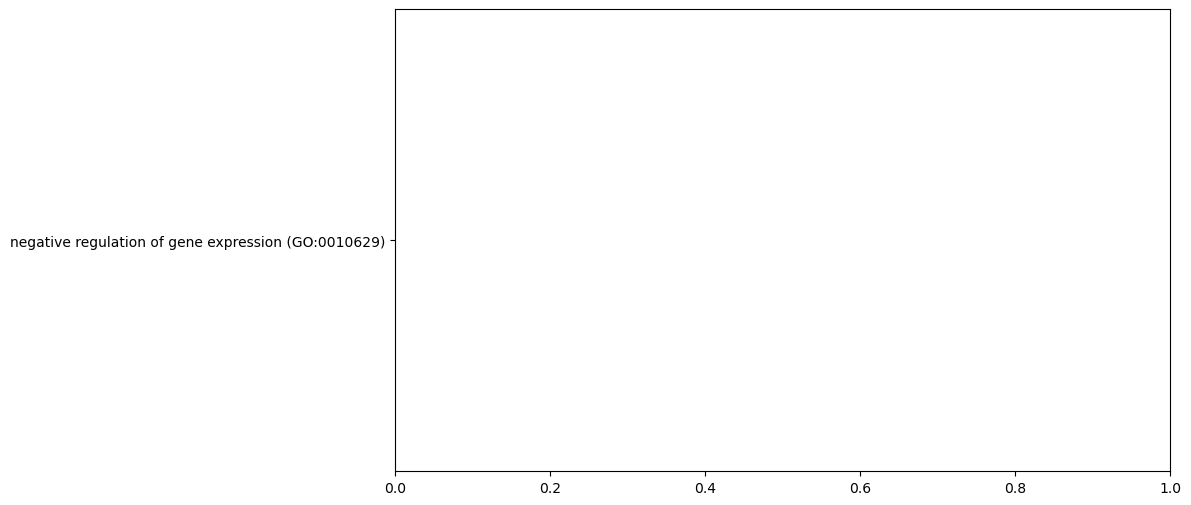

In [8]:
# Perform pathway enrichment analysis using GO gene set
enr_nr_go = gp.enrichr(gene_list=common_genes_list_nr, organism='Human', gene_sets= 'GO_Biological_Process_2018', background=list(gwas['Gene_name']))

# Print the results
print(enr_nr_go.res2d[['Term', 'Adjusted P-value']])
# Extract the top enriched pathways
top_pathways_go = enr_nr_go.res2d.head(10) 
# Plot the top enriched pathways
plt.figure(figsize=(10, 6))
plt.barh(top_pathways_go['Term'], top_pathways['P-value'])
plt.xlabel('P-value')
plt.title('Top Enriched GO Pathways Notaras & ASD GWAS')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest significance on top
plt.show()